(16, 16, 4, 4)

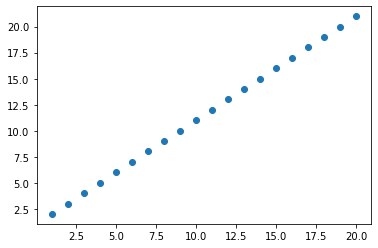

In [1]:
import import_ipynb
import tensorflow as tf
import numpy as np
# import matplotlib.pyplot as plt
X = tf.constant(np.arange(1,21),dtype=float)
y = tf.constant(np.arange(2,22),dtype=float)
# plt.scatter(X,y)
#plt.show()

In [24]:
tf.random.set_seed(12)
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=1))
model.add(tf.keras.layers.Dense(150, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
# model.add(tf.keras.layers.Dense(100, activation="relu"))
# model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(1))
model.compile(loss="mae", optimizer=tf.keras.optimizers.Adam(lr=0.01),metrics="mae")

C:\Users\Gopinath_Mandala\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [25]:
model.fit(tf.expand_dims(X_train, axis=-1),y_train,epochs=150,verbose=1)
model.summary()
model.predict([12.0])

Epoch 1/150
1/1 [==============================] - 0s 256ms/step - loss: 9.4947 - mae: 9.4947
Epoch 2/150
1/1 [==============================] - 0s 4ms/step - loss: 5.9034 - mae: 5.9034
Epoch 3/150
1/1 [==============================] - 0s 3ms/step - loss: 2.5376 - mae: 2.5376
Epoch 4/150
1/1 [==============================] - 0s 3ms/step - loss: 1.3187 - mae: 1.3187
Epoch 5/150
1/1 [==============================] - 0s 3ms/step - loss: 2.4003 - mae: 2.4003
Epoch 6/150
1/1 [==============================] - 0s 3ms/step - loss: 1.8033 - mae: 1.8033
Epoch 7/150
1/1 [==============================] - 0s 4ms/step - loss: 0.4858 - mae: 0.4858
Epoch 8/150
1/1 [==============================] - 0s 3ms/step - loss: 1.3158 - mae: 1.3158
Epoch 9/150
1/1 [==============================] - 0s 2ms/step - loss: 1.8547 - mae: 1.8547
Epoch 10/150
1/1 [==============================] - 0s 2ms/step - loss: 1.7388 - mae: 1.7388
Epoch 11/150
1/1 [==============================] - 0s 4ms/step - loss: 1.119

In [4]:
# from tensorflow.keras.utils import plot_model
# plot_model(model=model)

In [26]:
y_pred = model.predict(X_test)
y_pred

array([[17.925453],
       [18.918304],
       [19.911175],
       [20.904049]], dtype=float32)

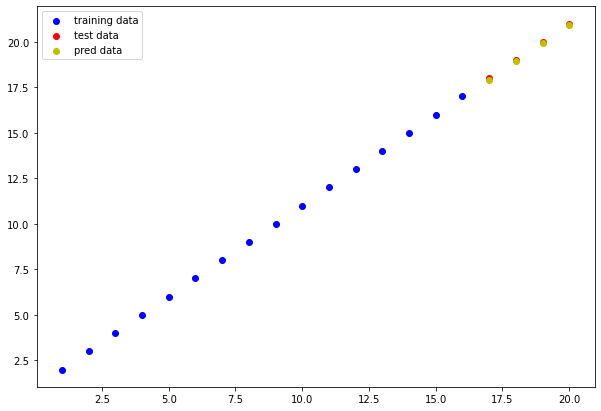

In [27]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,c='b',label="training data")
plt.scatter(X_test,y_test,c='r',label="test data")
plt.scatter(X_test,y_pred,c='y',label="pred data")
plt.legend()

In [29]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 14ms/step - loss: 0.0853 - mae: 0.0853


[0.08525514602661133, 0.08525514602661133]

In [8]:
tf.keras.losses.mean_absolute_error(y_test,tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=0.08525467>

In [9]:
y_test,tf.squeeze(tf.constant(y_pred))

(<tf.Tensor: shape=(4,), dtype=float32, numpy=array([18., 19., 20., 21.], dtype=float32)>,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([17.925453, 18.918304, 19.911175, 20.904049], dtype=float32)>)

In [11]:
h = tf.keras.losses.Huber()
h(y_test,tf.squeeze(tf.constant(y_pred)))

<tf.Tensor: shape=(), dtype=float32, numpy=0.0036659904>

In [12]:
tf.keras.losses.mse(y_test,tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=0.007331981>

In [14]:
model.save("mytesth5model.h5")

In [21]:
mymodel = tf.keras.models.load_model("mytesth5model.h5")
mymodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 150)               300       
                                                                 
 dense_1 (Dense)             (None, 100)               15100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,501
Trainable params: 15,501
Non-trainable params: 0
_________________________________________________________________


In [22]:
mymodel.predict(tf.constant(np.array([4.5])))

array([[5.5159993]], dtype=float32)